## RNN for IMDB movie review classification problem

A major characteristic of all neural networks, such as densely-connected networks and convnets, is that they had no memory. Each input shown to them gets processed independently, with no state kept in between inputs. With such networks, in order to process a sequence or a temporal series of data points, you have to show the entire sequence to the network at once, i.e. turn it into a single datapoint. For instance, this is what we have been doing in our IMDB example: an entire movie review would get transformed into a single large vector, and would be processed in one go. Such networks are called "feedforward networks".

By contrast, as you are reading the present sentence, you are processing it word by word, or rather, eye saccade by eye saccade, while keeping around memories of what came before—a fluid representation of the meaning that I am conveying with this sentence. Biological intelligence processes information incrementally while maintaining an internal model of what it is processing, built from past information and constantly getting updated as new information comes in.

Recurrent Neural Networks (RNNs) adopt the same principle, albeit in an extremely simplified version: they process sequences by iterating through the sequence elements and maintaining a "state" containing information relative to what they have seen so far. In effect, RNNs are a type of neural network that has an internal loop. The state of the RNN is reset in-between processing two different, independent sequences (e.g. two different IMDB reviews), so we still consider one sequence as a single datapoint, a single input to the network—what changes is that this datapoint is no longer
processed in a single step, rather, the network internally loops over sequence elements.

<font color="green">

### The whole code.
    
</font>

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

def plot_fig(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(history.history['acc'])),history.history['acc'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_acc'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(history.history['acc'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

<font color="green">
    
### The code explanation. 
    
### Step1: Preparing the IMDB data
    
</font>

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

C:\Users\li\anaconda3\envs\LLM\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


<font color="green">

### Step2: Train a model including an Embedding layer and a SimpleRNN layer
    
</font>

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - acc: 0.5979 - loss: 0.6582 - val_acc: 0.7774 - val_loss: 0.5259
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - acc: 0.8020 - loss: 0.4535 - val_acc: 0.7968 - val_loss: 0.4619
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - acc: 0.8575 - loss: 0.3441 - val_acc: 0.8404 - val_loss: 0.4072
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - acc: 0.8814 - loss: 0.2973 - val_acc: 0.8084 - val_loss: 0.4412
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - acc: 0.8967 - loss: 0.2620 - val_acc: 0.8416 - val_loss: 0.3788
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - acc: 0.9214 - loss: 0.2087 - val_acc: 0.8184 - val_loss: 0.4161
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - acc: 0.9385 - loss: 0.1662 - val_acc: 0.8480 - val_loss: 0.4194
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - acc: 0.9646 - loss: 0.1071 - val_acc: 0.8396 - val_loss: 0.4610
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

<font color="green">

### Step3: Plot the results.
    
</font>

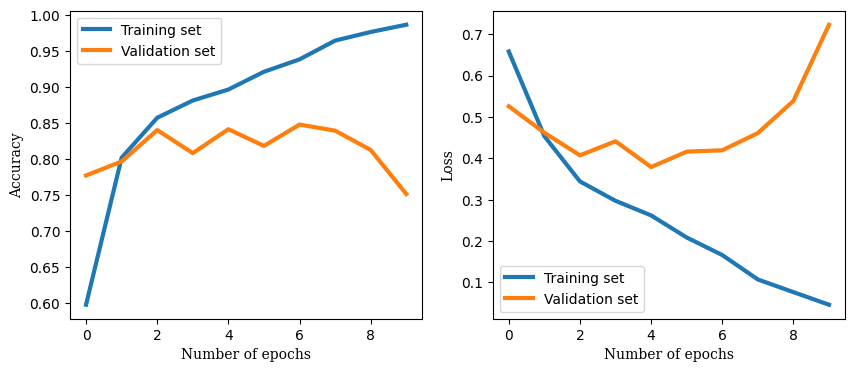

In [5]:
def plot_fig(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(history.history['acc'])),history.history['acc'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_acc'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(history.history['acc'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

<font color="green">

- Unfortunately, our small recurrent network doesn’t perform very well at all. Part of the problem is that our inputs only consider the first 500 words rather the full sequences—hence our RNN has access to not much information. The remainder of the problem is simply that isn’t very good at processing long sequences, like SimpleRNN text. Other types of recurrent layers perform much better. Let’s take a look at some more advanced layers.
    
</font>

## LSTM for IMDB movie review classification problem

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 32s 187ms/step - acc: 0.6719 - loss: 0.6018 - val_acc: 0.7172 - val_loss: 0.5371
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - acc: 0.8319 - loss: 0.3912 - val_acc: 0.7530 - val_loss: 0.5032
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 185ms/step - acc: 0.8644 - loss: 0.3325 - val_acc: 0.8372 - val_loss: 0.3731
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - acc: 0.8747 - loss: 0.3062 - val_acc: 0.8764 - val_loss: 0.2998
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - acc: 0.8951 - loss: 0.2676 - val_acc: 0.8758 - val_loss: 0.2951
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - acc: 0.9057 - loss: 0.2460 - val_acc: 0.8792 - val_loss: 0.3231
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - acc: 0.9142 - loss: 0.2265 - val_acc: 0.8472 - val_loss: 0.4575
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - acc: 0.9212 - loss: 0.2111 - val_acc: 0.8670 - val_loss: 0.3342
Epoch 9/10
157/157 ━━━━━━━━━━━━━

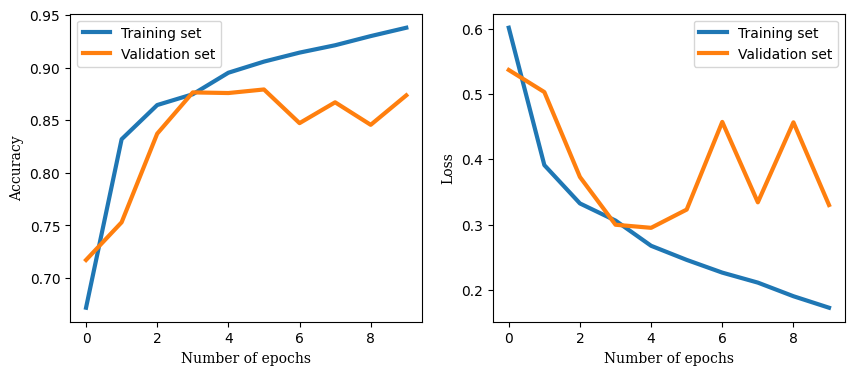

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(SimpleRNN(32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

def plot_fig(history):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(range(len(history.history['acc'])),history.history['acc'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_acc'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Accuracy",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(range(len(history.history['acc'])),history.history['loss'],linewidth=3, label='Training set')
    plt.plot(range(len(history.history['acc'])),history.history['val_loss'],linewidth=3, label='Validation set')
    plt.xlabel("Number of epochs",fontdict= {'family':'serif','size':10})
    plt.ylabel("Loss",fontdict= {'family':'serif','size':10})
    plt.legend()
    plt.show()
plot_fig(history)

<font color="green">

- We get up to 89% validation accuracy. Not bad: certainly much better than the SimpleRNN network—that’s largely because LSTM suffers SimpleRNN
much less from the vanishing gradient problem.
- However, it’s not groundbreaking either for such a computationally intensive approach. Why isn’t our LSTM performing better? One reason is that we did no effort to tune hyperparameters such as the embeddings dimensionality or the LSTM output dimensionality. Another may be lack of regularization. But honestly, the reason is mostly that analysing the global, long-term structure of the reviews (what LSTM is really good at) isn’t very helpful for a sentiment analysis problem. Such a basic problem is very well solved by simply looking at what words occur in each review, and at what frequency.
That’s what our first fully-connected approach was looking at. But there are far more difficult natural language processing problems out there, where the strength of LSTM will become apparent: in particular, question answering and machine translation.
    
</font>